# Double Mass Inclined Plane With Friction

### The goal of this study is to investigate the acceleration, as a function of $m_1$ and $m_2$.

From the free body diagram for $m_1$, we have that:

$
\begin{equation}
\sum_i F_{1i}^{(y)} = N_1 - m_1 g cos(\theta) = m_1 a_{1y} = 0
\end{equation}
$

$
\begin{equation}
\sum_i F_{1i}^{(x)} = T \mp f - m_1 g sin(\theta) = m_1 a_{1x}
\end{equation}
$

where the positive x-axis points up the plane, the $-$ sign corresponds to $m_1$ moving up the plane, and the $+$ sign corresponds to $m_1$ moving down the plane.

From the free body diagram for $m_2$, we have that:

$
\begin{equation}
\sum_i F_{2i}^{(x)} = m_2 g \mp f - T = m_2 a_{2x}
\end{equation}
$

where the positive x-axis is pointing downwards.

The friction force, $f = \mu N_1 = \mu m_1 g cos(\theta)$ from the first equation.  Substituting this into the second equation, and then combining with the third equation, we can determine that:

$
\begin{equation}
a = \left ( \frac{m2 \mp \mu m_1 cos(\theta) - m_1 sin(\theta)}{m_1 + m_2} \right ) g
\end{equation}
$

where we have used that $a_{1x} = a_{2x} = a$, and positive and negative signs correspond to the directions of motion of the system noted above.

In order to determine if the system is in motion or not, we solve this equation using $\mu = \mu_s^{max}$:

$
\begin{equation}
a_{up~the~plane} = \left ( \frac{m2 - \mu_s^{max} m_1 cos(\theta) - m_1 sin(\theta)}{m_1 + m_2} \right ) g
\end{equation}
$

$
\begin{equation}
a_{down~the~plane} = \left ( \frac{m2 + \mu_s^{max} m_1 cos(\theta) - m_1 sin(\theta)}{m_1 + m_2} \right ) g
\end{equation}
$

Now, if the system moves up the plane, then we should get $a_{up~the~plane}$ > 0.  If the system moves down the plane, we should get $a_{down~the~plane}$ < 0.  All other cases mean that the system will still be in the static
regime.



In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as cm    

In [2]:
def accel(m1,m2,mu,factor):
    return (m2 + factor*mu*m1*np.cos(theta*dtor)-m1*np.sin(theta*dtor))/(m1+m2)*g

In [16]:
nsteps = 101

mu_k = 0.400
mu_s_max = 0.600
theta = 0.0
g = 9.80

dtor = np.pi/180.0

m1 = np.zeros(nsteps)
m2 = np.zeros(nsteps)
a = np.zeros((nsteps,nsteps))
a_eq = np.zeros((nsteps,nsteps))

debug = False

for i in range(nsteps):
    for j in range(nsteps):
        
        m1[i] = 1.0 + (i)/(nsteps-1)*9.0
        m2[j] = 1.0 + (j)/(nsteps-1)*9.0
        
        a_up_static = accel(m1[i],m2[j],mu_s_max,-1)
        a_down_static = accel(m1[i],m2[j],mu_s_max,1)
        
        if debug: print ("m1 = %0.3f, m2 = %0.3f, a_right_static = %0.3f  a_left_static = %0.3f" % (m1[i],m2[j],a_up_static,a_down_static))

        if (a_up_static > 0):
            if debug: print ("Motion to the right")
            if (m1[i] == m2[j]):
                a_eq[i][j] = accel(m1[i],m2[j],mu_k,-1)
            else:
                a[i][j] = accel(m1[i],m2[j],mu_k,-1)
        else: 
            if (a_down_static < 0):
                if debug: print ("Motion to the left")
                if (m1[i] == m2[j]):
                    a_eq[i][j] = accel(m1[i],m2[j],mu_k,1)
                else:
                    a[i][j] = accel(m1[i],m2[j],mu_k,1)
            else:
                if debug: print ("No motion")
                if (m1[i] == m2[j]):
                    a_eq[i][j] = 0
                else:
                    a[i][j] = 0
                
        if debug: print ("m1 = %0.3f, m2 = %0.3f, a = %0.3f" % (m1[i],m2[j],a[i][j]))

<IPython.core.display.Javascript object>


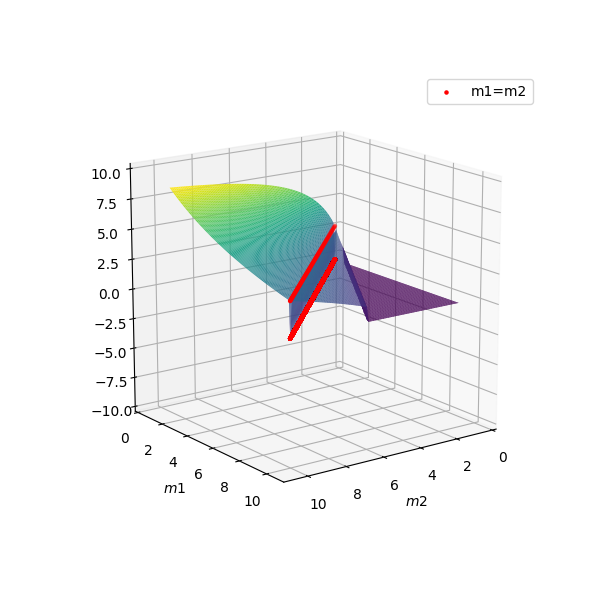

In [15]:
fig = plt.figure(figsize=(6, 6), dpi=100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(m1, m2)
ax.plot_surface(X, Y, a, cmap=cm.viridis, rstride=1, cstride=1)
ax.scatter(X,X,a_eq,marker='.',color='r',label='m1=m2')
ax.set_xlabel('$m2$')
ax.set_ylabel('$m1$')
ax.set_xlim(0, 11)
ax.set_ylim(0, 11)
ax.set_zlim(-10, 10)
ax.legend()